# Domanda 5

Discutere l’approssimazione a $m$ dati equispaziati ottenuti campionando la funzione $f(x) = exp(x/2)$ nell’intervallo $[−1, 1]$ usando polinomi di grado $n\in\{1, 2, 3, 5, 7\}$.

Si risolva il problema dei minimi quadrati sia mediante le equazioni normali che con SVD, calcolando l’errore di approssimazione in norma 2 per entrambi i metodi. 

Infine graficare le approssimazioni polinomiali ottenute.

Soluzione equazioni normali =  [1.05442038 0.51590529] 

Errore equazioni normali =  0.13569669703938536 

Soluzione SVD =  [1.05442038 0.51590529] 

Errore svd =  0.13569669703938542 



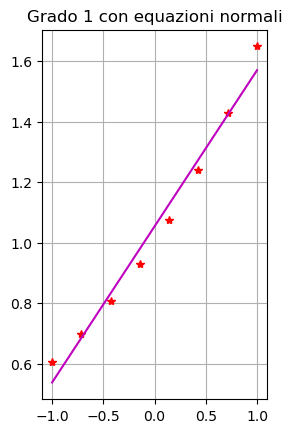

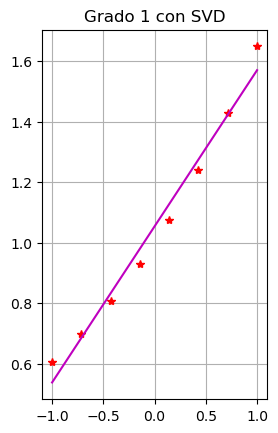

Soluzione equazioni normali =  [0.99967438 0.51590529 0.12774067] 

Errore equazioni normali =  0.012058446214597819 

Soluzione SVD =  [0.99967438 0.51590529 0.12774067] 

Errore svd =  0.012058446214597921 



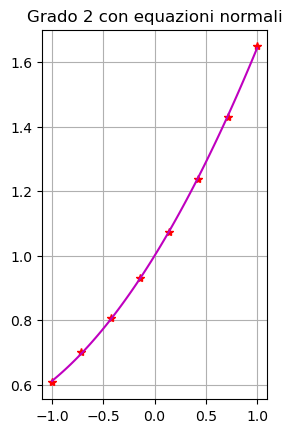

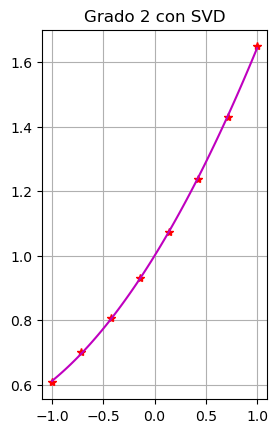

Soluzione equazioni normali =  [0.99967438 0.49991818 0.12774067 0.02117212] 

Errore equazioni normali =  0.0007483485069941463 

Soluzione SVD =  [0.99967438 0.49991818 0.12774067 0.02117212] 

Errore svd =  0.0007483485069941806 



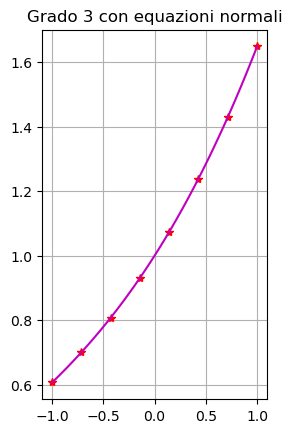

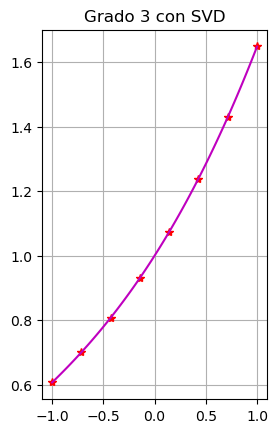

Soluzione equazioni normali =  [1.00000054e+00 5.00000109e-01 1.24988610e-01 2.08322310e-02
 2.63674673e-03 2.62965450e-04] 

Errore equazioni normali =  1.0545011893795373e-06 

Soluzione SVD =  [1.00000054e+00 5.00000109e-01 1.24988610e-01 2.08322310e-02
 2.63674673e-03 2.62965450e-04] 

Errore svd =  1.054501189285918e-06 



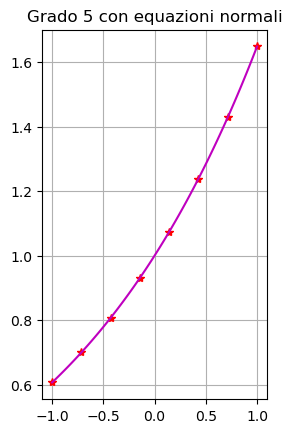

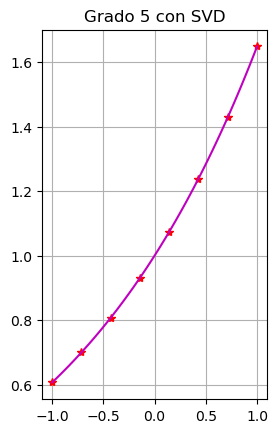

Soluzione equazioni normali =  [1.00000000e+00 5.00000000e-01 1.25000011e-01 2.08333339e-02
 2.60408666e-03 2.60412227e-04 2.18680421e-05 1.55935102e-06] 

Errore equazioni normali =  1.9759162895380473e-14 

Soluzione SVD =  [1.00000000e+00 5.00000000e-01 1.25000011e-01 2.08333339e-02
 2.60408666e-03 2.60412226e-04 2.18680417e-05 1.55935194e-06] 

Errore svd =  1.4602703977091186e-15 



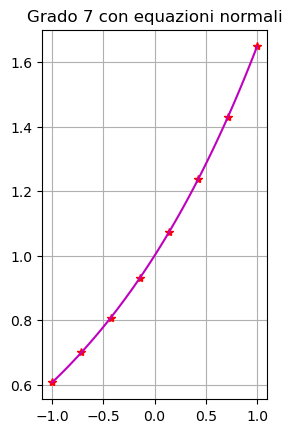

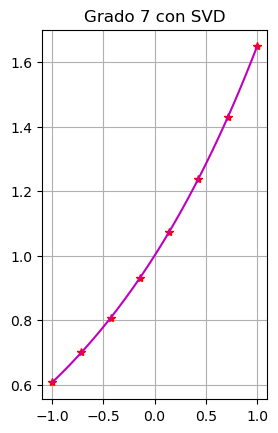

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg


m = 8
x = np.linspace(-1, 1, m)
y = np.exp(x/2)
degree_pol = np.array((1, 2, 3, 5, 7))

for n in degree_pol:
    A = np.zeros((m, n+1))
    for i in range(n+1):
        A[:, i] = x**i
        
    U, s , Vh = scipy.linalg.svd(A)
    x_svd = np.zeros(n+1)
    
    ATA = np.matmul(A.T, A)
    ATy = np.matmul(A.T, y)
    
    lu, piv = scipy.linalg.lu_factor(ATA)
    x_eqnorm = scipy.linalg.lu_solve((lu, piv), ATy)
    print("Soluzione equazioni normali = ", x_eqnorm, '\n')
    
    res_eqnorm = np.linalg.norm(A @ x_eqnorm - y)
    print("Errore equazioni normali = ", res_eqnorm, '\n')
    
    for i in range(n+1):
        ui = U[:, i]
        vi = Vh[i, :]
        
        x_svd = x_svd + (np.dot(ui.T, y) *vi) / s[i]
        
    print("Soluzione SVD = ", x_svd, '\n')
        
    res_svd = np.linalg.norm(A @ x_svd - y)
    print("Errore svd = ", res_svd, '\n')
        
    m_plot = 100
    x_plot = np.linspace(x[0], x[-1], m_plot)
    A_plot = np.zeros((m_plot, n+1))
        
    for i in range(n+1):
        A_plot[:, i] = x_plot ** i
            
    y_eqnorm = A_plot @ x_eqnorm
    
    
    fig1 = plt.subplot(1, 2, 1)
    plt.title(f"Grado {n} con equazioni normali")
    plt.plot(x, y, '*r')
    plt.plot(x_plot, y_eqnorm, 'm')
    plt.grid()
        
    plt.show()
        
        
    y_svd = A_plot @ x_svd
        
    fig2 = plt.subplot(1, 2, 2)
    plt.title(f"Grado {n} con SVD")
    plt.plot(x, y, '*r')
    plt.plot(x_plot, y_svd, 'm')
    plt.grid()
        
    plt.show()
